In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
model_name = 'model_12'
train_count = 1500
checkpoint_steps = 100

In [3]:
df = None

df = pd.read_json(f"./logs/{model_name}/score.log", lines=True).head(300)
df['checkpoint'] = 0

for i in range(checkpoint_steps, train_count+checkpoint_steps, checkpoint_steps):
    iter_df = pd.read_json(f"./logs/checkpoints_{model_name}/checkpoint-{i}/score.log", lines=True)
    iter_df['checkpoint'] = i
    df = pd.concat([df, iter_df])

print(len(df))
df.head(5)

4800


,hash,project_path,relative_go_package,func_name,input_code,prompt,generate_time,completion,score_time,result,reward,checkpoint
0,3536598be3a14280f98fff5ab07e535dc21274d6166717...,07be54bc22cf4dd2dd16a9788d2fc88952c438ae/,wallet/,NewRecoveryManager,"package wallet\n\nimport (\n\t""github.com/btcs...",[{'content': ' You are an expert programmer. ...,16.271075,Here are some unit tests for the `NewRecoveryM...,14.269766,"{'error': 'go mod tidy: code 1, 'strderr' go: ...",0.0000,0
1,816064f58b31195056f0077bacfa360c29741dd20ebcad...,a05857e0dd18951223293e73beaaa1c46f6c78ab/plc4go/,protocols/cbus/readwrite/model/,CastApplicationAddress2,"package model\n\nimport (\n\t""github.com/apach...",[{'content': ' You are an expert programmer. ...,25.344055,Here is a simple example of how you might writ...,0.828285,"{'error': 'go test build failed: stdout = {""Im...",0.0000,0
2,ac122e949b9a636d5a9d30af059fb59b6c5ee9b964cfd5...,eda891258c0223c437133e401b431975627d9104/,table/,min,"package table\n\nfunc min(a, b int) int {\n\ti...",[{'content': ' You are an expert programmer. ...,16.059062,Here are some unit tests for the `min` functio...,1.093383,"{'error': '', 'error_type': '', 'test_results'...",0.8334,0
3,4feeca69ec3856921e32853e3ea6827cc3b103d1a2e907...,ffb613991af5a632958fd923e906511db9882642/pkg/a...,pingcap/v1alpha1/,schema_k8sio_api_core_v1_AttachedVolume,"package v1alpha1\n\nimport (\n\t""k8s.io/kube-o...",[{'content': ' You are an expert programmer. ...,21.806600,Here is a simple example of how you might writ...,0.616101,"{'error': 'go test build failed: stdout = {""Im...",0.0000,0
4,3c988bb22a60618c8f48e8dbcf57fe23c858cb8dd63447...,806f312c0ddddb3c1d9a418a3b88e78170b7bd5d/,pkg/proxy/,WithTLSEnabled,"package proxy\n\nimport (\n\t""github.com/matri...",[{'content': ' You are an expert programmer. ...,11.620655,Here is a simple unit test for the `WithTLSEna...,0.971580,"{'error': 'go test build failed: stdout = {""Im...",0.0000,0


In [4]:
df['coverage'] = df['result'].apply(lambda x: float(x['coverage']))
df['mutation_score'] = df['result'].apply(lambda x: float(x['mutation_score']))
df['error_type'] = df['result'].apply(lambda x: str(x['error_type']))
df['all_passed'] = df['result'].apply(lambda x: int(x['test_results']['all_passed']))
df['is_error'] = df['error_type'] != ''

df.head(5)

,hash,project_path,relative_go_package,func_name,input_code,prompt,generate_time,completion,score_time,result,reward,checkpoint,coverage,mutation_score,error_type,all_passed,is_error
0,3536598be3a14280f98fff5ab07e535dc21274d6166717...,07be54bc22cf4dd2dd16a9788d2fc88952c438ae/,wallet/,NewRecoveryManager,"package wallet\n\nimport (\n\t""github.com/btcs...",[{'content': ' You are an expert programmer. ...,16.271075,Here are some unit tests for the `NewRecoveryM...,14.269766,"{'error': 'go mod tidy: code 1, 'strderr' go: ...",0.0000,0,0.0,0.0,get_deps,0,True
1,816064f58b31195056f0077bacfa360c29741dd20ebcad...,a05857e0dd18951223293e73beaaa1c46f6c78ab/plc4go/,protocols/cbus/readwrite/model/,CastApplicationAddress2,"package model\n\nimport (\n\t""github.com/apach...",[{'content': ' You are an expert programmer. ...,25.344055,Here is a simple example of how you might writ...,0.828285,"{'error': 'go test build failed: stdout = {""Im...",0.0000,0,0.0,0.0,test_build_failed,0,True
2,ac122e949b9a636d5a9d30af059fb59b6c5ee9b964cfd5...,eda891258c0223c437133e401b431975627d9104/,table/,min,"package table\n\nfunc min(a, b int) int {\n\ti...",[{'content': ' You are an expert programmer. ...,16.059062,Here are some unit tests for the `min` functio...,1.093383,"{'error': '', 'error_type': '', 'test_results'...",0.8334,0,66.7,0.0,,1,False
3,4feeca69ec3856921e32853e3ea6827cc3b103d1a2e907...,ffb613991af5a632958fd923e906511db9882642/pkg/a...,pingcap/v1alpha1/,schema_k8sio_api_core_v1_AttachedVolume,"package v1alpha1\n\nimport (\n\t""k8s.io/kube-o...",[{'content': ' You are an expert programmer. ...,21.806600,Here is a simple example of how you might writ...,0.616101,"{'error': 'go test build failed: stdout = {""Im...",0.0000,0,0.0,0.0,test_build_failed,0,True
4,3c988bb22a60618c8f48e8dbcf57fe23c858cb8dd63447...,806f312c0ddddb3c1d9a418a3b88e78170b7bd5d/,pkg/proxy/,WithTLSEnabled,"package proxy\n\nimport (\n\t""github.com/matri...",[{'content': ' You are an expert programmer. ...,11.620655,Here is a simple unit test for the `WithTLSEna...,0.971580,"{'error': 'go test build failed: stdout = {""Im...",0.0000,0,0.0,0.0,test_build_failed,0,True


In [5]:
reward = df.groupby('checkpoint').aggregate({
    'reward': 'mean',
})

#coverage = df.query('is_error == False').groupby('checkpoint').aggregate({
coverage = df.groupby('checkpoint').aggregate({
    'coverage': 'mean',
})

#mutation_score = df.query('all_passed == 1').groupby('checkpoint').aggregate({
mutation_score = df.groupby('checkpoint').aggregate({
    'mutation_score': 'mean',
})

scores = pd.concat([reward, coverage, mutation_score], axis=1)

scores.iloc[:23]

,reward,coverage,mutation_score
checkpoint,,,
0,0.168296,16.892333,0.035944
100,0.149242,15.345333,0.029960
200,0.166082,15.718000,0.042571
300,0.158403,15.490333,0.035330
400,0.164118,15.800667,0.044608
500,0.149513,14.125333,0.035126
600,0.168547,15.900667,0.043293
700,0.171188,16.775667,0.033864
800,0.182925,18.223333,0.042280


/tmp/ipykernel_1554536/2758998212.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  axes[1].plot(df.index, p(df.index), 'b--', linewidth=1, label='Trend', color='green')
/tmp/ipykernel_1554536/2758998212.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  axes[2].plot(df.index, p(df.index), 'b--', linewidth=1, label='Trend', color='red')


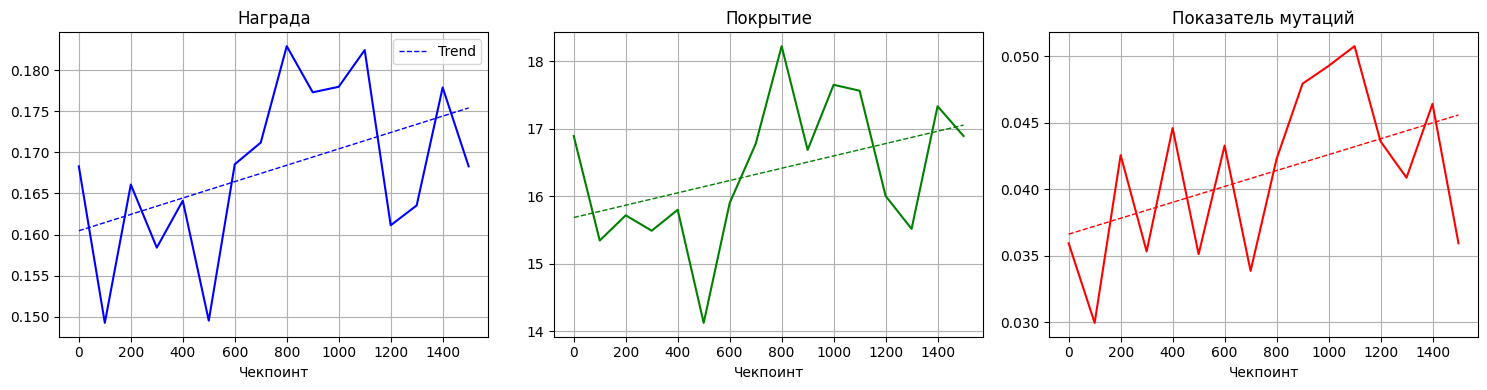

In [9]:
import numpy as np

def plot(df):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    # Reward
    axes[0].plot(df.index, df['reward'], color='blue')
    z = np.polyfit(df.index, df['reward'], 1)
    p = np.poly1d(z)
    axes[0].plot(df.index, p(df.index), 'b--', linewidth=1, label='Trend')
    axes[0].set_title('Награда')
    axes[0].set_xlabel('Чекпоинт')
    axes[0].grid(True)
    axes[0].legend()

    # Coverage
    axes[1].plot(df.index, df['coverage'], color='green')
    z = np.polyfit(df.index, df['coverage'], 1)
    p = np.poly1d(z)
    axes[1].plot(df.index, p(df.index), 'b--', linewidth=1, label='Trend', color='green')
    axes[1].set_title('Покрытие')
    axes[1].set_xlabel('Чекпоинт')
    axes[1].grid(True)
    axes[0].legend()

    # Mutation Score
    axes[2].plot(df.index, df['mutation_score'], color='red')
    z = np.polyfit(df.index, df['mutation_score'], 1)
    p = np.poly1d(z)
    axes[2].plot(df.index, p(df.index), 'b--', linewidth=1, label='Trend', color='red')
    axes[2].set_title('Показатель мутаций')
    axes[2].set_xlabel('Чекпоинт')
    axes[2].grid(True)
    axes[0].legend()

    # plt.xlim(0, 1500)

    plt.tight_layout()
    plt.show()

# plot(scores.iloc[:23])
plot(scores)